# I'm going to follow the following approach for solving this problem:
  * Problem Defination
    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's 
    dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
  
  * Data
    The data description can be found on https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt
  
  * Modelling
    I'm going to use xgboost algorithim to find out the best out of this.

  * Evaluation
    Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 
    (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
  

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Importing Data
df = pd.read_csv("drive/MyDrive/House-price-predict-data/train.csv")
df_test = pd.read_csv("drive/MyDrive/House-price-predict-data/test.csv")

In [3]:
# Exploring Data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
set(df.columns) - set(df_test.columns)

{'SalePrice'}

# Preprocessing Data

In [5]:

def preprocessing_data(df):
  """
   Finding columns which are of string type we have to convert all string to category values.
  """
  for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
      df[label] = content.astype("category").cat.as_ordered()

  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      df[label] = pd.Categorical(content).codes + 1
    
    else:
      if pd.isnull(content).sum():
        df[label] = content.fillna(content.median())
  return df

df = preprocessing_data(df)
df_test = preprocessing_data(df_test)

In [ ]:
len(df.columns)

81

In [ ]:
len(df_test.columns)

80

# **Modelling using XGBoost Algorithim**

In [6]:
# Using Linear Regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
np.random.seed(42)
LR_model = LinearRegression()
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
LR_model.fit(X_train, y_train)
LR_model.score(X_test, y_test)
y_preds = LR_model.predict(X_test)
mean_squared_log_error(y_test, y_preds)

ValueError: ignored

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
model = XGBRegressor(objective='reg:squarederror')
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [8]:
model.score(X_test, y_test)

0.8966203527310124

In [ ]:
y_preds = model.predict(X_test)

## Evaluation

In [11]:
from sklearn.metrics import mean_squared_error

def RMSLE(y_test, y_preds):
  return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(model):
  scores = {
      "Root Mean Squared Log  Error" : RMSLE(y_test, y_preds)
  }
  return scores

show_scores(model)

{'Root Mean Squared Log  Error': 37432.12846846665}

In [12]:
show_scores(LR_model)

{'Root Mean Squared Log  Error': 37432.12846846665}

# Make Predictions on Test Data

In [13]:
test_preds = model.predict(df_test)
test_preds

array([122993.164, 156581.94 , 179058.12 , ..., 163454.56 , 120690.73 ,
       229384.88 ], dtype=float32)

In [14]:
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds

In [15]:
df_preds.to_csv("drive/MyDrive/House-price-predict-data/HousePrice.csv", index=False)

In [ ]:
## Feature Importance
model.feature_importances_

array([5.7602616e-04, 7.2995326e-03, 7.9678046e-03, 2.3267015e-03,
       6.2962342e-03, 0.0000000e+00, 1.5425167e-05, 1.2323422e-03,
       1.3532049e-02, 0.0000000e+00, 3.1949432e-05, 0.0000000e+00,
       5.7300688e-03, 1.3141802e-03, 0.0000000e+00, 5.5832397e-03,
       0.0000000e+00, 2.8181568e-01, 2.8922805e-03, 9.7851204e-03,
       1.3112255e-02, 0.0000000e+00, 0.0000000e+00, 1.0498427e-03,
       7.5121461e-03, 0.0000000e+00, 8.4453973e-04, 1.0639662e-02,
       0.0000000e+00, 0.0000000e+00, 6.1495215e-02, 3.6800248e-03,
       3.7780926e-03, 1.2934250e-03, 1.2351557e-02, 1.5822871e-03,
       1.8074199e-03, 1.3351362e-03, 2.2824699e-02, 3.3722583e-03,
       0.0000000e+00, 1.3747685e-02, 0.0000000e+00, 3.0348277e-02,
       1.0837827e-02, 0.0000000e+00, 3.3141483e-02, 3.7900631e-03,
       0.0000000e+00, 1.5915203e-01, 0.0000000e+00, 1.5683974e-03,
       3.3751817e-03, 2.9646598e-02, 2.5991568e-02, 1.8119003e-03,
       1.4363681e-02, 1.3424163e-02, 1.9524852e-02, 4.0505133e

In [26]:
# Plotting Feature Importance

def plotting(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                      "feature_importance": importances})
                    .sort_values("feature_importance", ascending=False)
                    .reset_index(drop=True))
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importance"][:20])
  ax.set_xlabel("Features")
  ax.set_ylabel("Feature Importance")
  ax.invert_yaxis()
  fig.savefig('drive/MyDrive/House-price-predict-data/feature_importance.png')
  

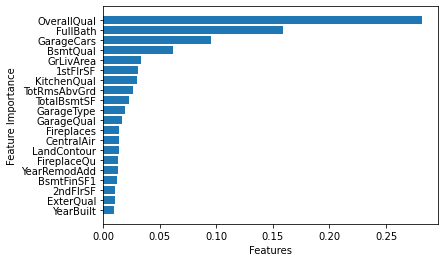

In [27]:
plotting(X_train.columns, model.feature_importances_)

In [ ]:
# Import the exported file (output)

df_exported = pd.read_csv("drive/MyDrive/House-price-predict-data/HousePrice.csv")
df_exported.head()

,Id,SalePrice
0,1461,122993.164
1,1462,156581.940
2,1463,179058.120
3,1464,184013.310
4,1465,202671.220
